# **LAB 8 - K-Nearest Neighbors (KNN) Classifier**

## **LAB TASKS**

## 1.Load a dataset (e.g., Iris, Breast Cancer dataset).

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
df = load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2.Apply data preprocessing (handle missing values, encode categorical data).

In [6]:
def data_summary(dataframe):
    summary = pd.DataFrame({
        'Data Type': dataframe.dtypes,
        'Missing Values': dataframe.isnull().sum(),
        'Unique Values': dataframe.nunique(),
        'Encode catagorical': [dataframe[col].dtype == 'object' for col in dataframe.columns]
    })
    
    return summary

data_summary(df)

,Data Type,Missing Values,Unique Values,Encode catagorical
sepal length (cm),float64,0,35,False
sepal width (cm),float64,0,23,False
petal length (cm),float64,0,43,False
petal width (cm),float64,0,22,False
target,int64,0,3,False


- No missing values in this data

- No column that i apply categorical encoding , because all are numerical except 'name' column.


## 3.Split the dataset into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 4.Train a KNN classifier with different values of K (e.g., 3, 5, 7).

In [23]:
## 4.Train a KNN classifier with different values of K (e.g., 3, 5, 7).
from sklearn.neighbors import KNeighborsClassifier
k_values = [3, 5, 9 , 12 ,15 ,18 ,20 ,25, 30 , 35,]
models = {}
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    models[k] = model
models

{3: KNeighborsClassifier(n_neighbors=3),
 5: KNeighborsClassifier(),
 9: KNeighborsClassifier(n_neighbors=9),
 12: KNeighborsClassifier(n_neighbors=12),
 15: KNeighborsClassifier(n_neighbors=15),
 18: KNeighborsClassifier(n_neighbors=18),
 20: KNeighborsClassifier(n_neighbors=20),
 25: KNeighborsClassifier(n_neighbors=25),
 30: KNeighborsClassifier(n_neighbors=30),
 35: KNeighborsClassifier(n_neighbors=35)}

## 5.Make predictions on the test set.

In [24]:
predictions = {}
for k, model in models.items():
    y_pred = model.predict(X_test)
    predictions[k] = y_pred

predictions

{3: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 5: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 9: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 12: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 15: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 18: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 20: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 25: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 30: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 

## 6.Evaluate performance using accuracy, precision, recall, and F1-score.

In [25]:
from sklearn.metrics import accuracy_score,recall_score, f1_score, classification_report, confusion_matrix
for k, y_pred in predictions.items():
    print(f"Metrics for K={k}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Metrics for K=3:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
--------------------------------------------------
Metrics for K=5:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00 

## 7.Test how accuracy changes with different values of K.

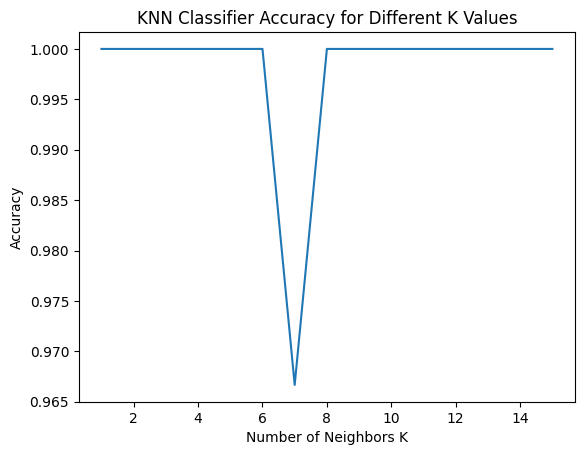

In [26]:
import matplotlib.pyplot as plt
k_range = range(1, 16)
accuracies = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, accuracies)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.show()